In [1]:
# import tensorflow as tf
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

# You'll generate plots of attention in order to see which parts of an image
# our model focuses on during captioning
import matplotlib.pyplot as plt

# Scikit-learn includes many helpful utilities
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import re
import numpy as np  
import os
import time
import json
from glob import glob
from PIL import Image
import pickle
import cv2
from sklearn.utils import shuffle

# print(tf.__version__) 

In [2]:
from IPython.display import clear_output, display
import os.path
from os import path
import shutil
import PIL
from pathlib import Path
from matplotlib import pyplot as plt

In [3]:
from IPython.display import clear_output

In [4]:
import numpy as np

from PIL import ImageFont
from PIL import Image, ImageDraw
from PIL import ImageColor

from scipy.ndimage.interpolation import map_coordinates
from scipy.ndimage.filters import gaussian_filter

In [5]:
import random

In [6]:
def read_label( path):
  f= open( path)
  d= f.read()
  f.close()
  return d 

def write_label( path, text):
  f= open( path, "w")
  f.write( text)
  f.close()

def show( img, name= 'noname'):
  plt.imshow( img)
  plt.title( name)
  plt.show()

def show_gimage( img, name= 'noname'):
  plt.imshow( img, cmap= 'gray')
  plt.title( name)
  plt.show()

def _load_image( path):
  # return cv2.imread( path, cv2.IMREAD_GRAYSCALE)
  return cv2.imread( path)
  
def write_image( path, img):
  cv2.imwrite( path, img)

# def resize( img, scale_percent= 60, verbose=False):
#   #scale_percent = 60 # percent of original size
#   width = int(img.shape[1] * scale_percent / 100)
#   height = int(img.shape[0] * scale_percent / 100)
#   dim = (width, height)
#   if verbose:
#     print( "scale", scale_percent)
#     print( "dim", dim)
#   # resize image
#   return cv2.resize(img, dim, interpolation = cv2.INTER_AREA) 

In [7]:
import time
import shutil
import uuid
from shutil import copyfile

In [ ]:
#orig_imgdir= 'C:/mestrado/datasets/handmade/imagens-originais/paired-part5-/images_with_header'
orig_imgdir= 'C:/mestrado/datasets/final/handmade/images_with_header'
dest_imgdir= 'C:/mestrado/datasets/final/parts-lib/from-handmade'
files= glob( os.path.join( orig_imgdir, "*.jpg"))

In [ ]:
len( files)

In [ ]:
str( uuid.uuid4())[:6]

In [8]:
words= ['Ba4', 'Ba5', 'Ba7', 'Bb2', 'Bb3', 'Bb4', 'Bb4+', 'Bb5', 'Bb5+', 'Bb7', 'Bc4', 'Bc5', 'Bd2', 'Bd3', 'Bd6', 'Bd7', 'Be2', 'Be3', 'Be5', 'Be6', 'Be7', 'Bf3', 'Bf4', 'Bf5', 'Bg2', 'Bg3', 'Bg4', 'Bg5', 'Bg7', 'Bh4', 'Bh6', 'Bh7', 'Bxb4', 'Bxc3', 'Bxc3+', 'Bxc4', 'Bxc5', 'Bxc6', 'Bxc7', 'Bxd2+', 'Bxd6', 'Bxd7+', 'Bxf6', 'Kd8', 'Kxd8', 'Na4', 'Na5', 'Na6', 'Nb3', 'Nb4', 'Nb5', 'Nb6', 'Nbd2', 'Nbd7', 'Nbxd2', 'Nc2', 'Nc3', 'Nc5', 'Nc6', 'Nce7', 'Nd2', 'Nd4', 'Nd5', 'Nd6+', 'Nd7', 'Ndb5', 'Nde2', 'Ne1', 'Ne2', 'Ne4', 'Ne5', 'Ne7', 'Nf1', 'Nf3', 'Nf6', 'Nfd7', 'Ng5', 'Nge2', 'Nge7', 'Ngf3', 'Ngf6', 'Nh5', 'Nxc6', 'Nxd4', 'Nxd5', 'Nxd7', 'Nxe4', 'Nxe5', 'Nxf6+', 'O-O', 'O-O-O', 'Qa4', 'Qa5', 'Qa5+', 'Qb3', 'Qb6', 'Qc2', 'Qc3', 'Qc7', 'Qd1', 'Qd2', 'Qd3', 'Qd4', 'Qd5', 'Qd6', 'Qd7', 'Qe1', 'Qe2', 'Qe7', 'Qe8', 'Qf3', 'Qf6', 'Qg6', 'Qh4', 'Qxb2', 'Qxb3', 'Qxc4', 'Qxc7', 'Qxd4', 'Qxd5', 'Qxd6', 'Qxd8+', 'Qxe4+', 'Qxf6', 'Rb1', 'Rb8', 'Rc8', 'Re1', 'Re8', 'a3', 'a4', 'a5', 'a6', 'b3', 'b4', 'b5', 'b6', 'bxc3', 'bxc6', 'c3', 'c4', 'c5', 'c6', 'cxb3', 'cxd4', 'cxd5', 'cxd6', 'd3', 'd4', 'd5', 'd6', 'dxc3', 'dxc4', 'dxc5', 'dxc6', 'dxe4', 'e3', 'e4', 'e5', 'e6', 'exd4', 'exd5', 'exf6', 'f3', 'f4', 'f5', 'f6', 'g3', 'g5', 'g6', 'gxf6', 'h3', 'h4', 'h5', 'h6']

In [9]:
len( words)

175

In [ ]:
#
# recorta a imagem em partes a partir da base de manuscritos..
#
def save_cuts( labels, cuts):
    
    for i in range( 0, len( cuts)):

        label= labels[i].replace( '...', '___')
        folder= os.path.join( dest_imgdir, label)
        
        Path(folder).mkdir(parents=True, exist_ok=True)
        fname= label+"_"+ str( uuid.uuid4())[:6]+'.jpg'
#         print( 'save to ', fname)
        write_image( os.path.join( folder, fname), cuts[i])
        

def showsmall( img, name= 'noname'):
    plt.figure(figsize = (4,6))    
    plt.imshow( img)
    plt.title( name)
    plt.show()
                    
def showbig( img, name= 'noname'):
    plt.figure(figsize = (10,2))    
    plt.imshow( img)
    plt.title( name)
    plt.show()
    
    
def crop_only( img, y, h, x, w):
    y= max( y, 0)
    x= max( x, 0)
#     print( '>', y, h, x, w)
    crop_img= img[ y:y+h, x:x+w]
    return crop_img


def get_cut_for( i, col_img):
    img= col_img[0] if i%2== 0 else col_img[1]

    h= 69.72
    ln= int( i/2)
    margin_h= 5
    shift_h= 12
    y= int( ln* h)+ shift_h
    return crop_only( img, y-margin_h, int(h+2*margin_h), 0, img.shape[1])


def generate_parts(_files):
    # w= 335 
    w= 320 
    count= 0
    for f in _files:
        # trim
    #     clear_output()
        if count%10== 0:
            print( count)
        count+= 1

    #     clear_output()
        img= cv2.imread( f)
#         show( img)

        labels= read_label( os.path.join( 'C:/mestrado/datasets/final/handmade/labels',
                                        Path( f).name.replace( '.jpg', '.pgn')
                                        ))

#         print( labels)

        img1= img[504:,:]
#         img2= np.concatenate((
#             img1[:, 3:(3+w)],
#             img1[:, 435:(435+w)],
#             img1[:, 772:(772+w)],
#             img1[:, 1200:(1200+w)]
#         ), axis= 1)
#         showsmall( img1[:, 5:(5+w)])
#         showsmall( img1[:, 435:(435+w)])
#         showsmall( img1[:, 772:(772+w)])
#         showsmall( img1[:, 1200:(1200+w)])

        img_1= img1[:, 5:(5+w)]
        img_2= img1[:, 435:(435+w)]
#         img_3= img1[:, 772:(772+w)]
#         img_4= img1[:, 1200:(1200+w)]


#         showsmall(img_1)
#         showsmall(img_2)
        pgn= labels.split()
        col_img= [img_1, img_2]
        cuts= []
        labels= []
        for i in range( 0, min( 50, len( pgn))):
            if pgn[i] in words:
                img_cut= get_cut_for( i, col_img)
#                 showsmall( img_cut, pgn[i])

                cuts.append( img_cut)
                labels.append( pgn[i])
            
        save_cuts( labels, cuts)

    #     m= input()    
    #     img3= cv2.resize(img2, (678, 900), interpolation = cv2.INTER_AREA)  
    #     img3= img2
    #     to_file= os.path.join( dest_imgdir, Path( f).name)
    #     print( 'save to ', to_file)
    #     write_image( to_file, img3)

generate_parts( files[0:1])

In [ ]:
generate_parts( files[1:20])

In [ ]:
generate_parts( files[20:100])

In [ ]:
generate_parts( files[100:1000])

In [ ]:
generate_parts( files[1000:])

In [ ]:
#
# gera 8 linhas de handmade
#


In [45]:
#orig_imgdir= 'C:/mestrado/datasets/handmade/imagens-originais/paired-part5-/images_with_header'
orig_imgdir= 'C:/mestrado/datasets/final/handmade/images_with_header'
dest_imgdir= 'C:/mestrado/datasets/final/handmade-8lines'
files= glob( os.path.join( orig_imgdir, "*.jpg"))

In [46]:
len( files)

3408

In [56]:

#
# recorta a imagem em partes a partir da base de manuscritos..
#
# def save_cuts( labels, cuts):
    
#     for i in range( 0, len( cuts)):
#         label= labels[i].replace( '...', '___')
#         folder= os.path.join( dest_imgdir, label)
        
#         Path(folder).mkdir(parents=True, exist_ok=True)
#         fname= label+"_"+ str( uuid.uuid4())[:6]+'.jpg'
# #         print( 'save to ', fname)
#         write_image( os.path.join( folder, fname), cuts[i])
        
        
def save_cuts_8lines( labels, img, f_original):
    img_fname= os.path.join( dest_imgdir, "images", Path(f_original).name)
    write_image( img_fname, img)
    labels= " ".join( labels.split()[0:16])
    write_label( img_fname.replace( 'images', 'labels').replace( '.jpg', '.pgn'), labels)
    
def showsmall( img, name= 'noname'):
    plt.figure(figsize = (4,6))    
    plt.imshow( img)
    plt.title( name)
    plt.show()
                    
def showbig( img, name= 'noname'):
    plt.figure(figsize = (10,2))    
    plt.imshow( img)
    plt.title( name)
    plt.show()
    
    
def crop_only( img, y, h, x, w):
    y= max( y, 0)
    x= max( x, 0)
#     print( '>', y, h, x, w)
    crop_img= img[ y:y+h, x:x+w]
    return crop_img


# def get_cut_for( i, col_img):
#     img= col_img[0] if i%2== 0 else col_img[1]

#     h= 69.72
#     ln= int( i/2)
#     margin_h= 5
#     shift_h= 12
#     y= int( ln* h)+ shift_h
#     return crop_only( img, y-margin_h, int(h+2*margin_h), 0, img.shape[1])


def get_8lines_cut( col_img):
#     print( len( col_img))
    h= 69.72
    margin_h= 20
    col1= crop_only( col_img[0], 0, int( h*8)+margin_h, 0, col_img[0].shape[1])
    col2= crop_only( col_img[1], 0, int( h*8)+margin_h, 0, col_img[1].shape[1])
    img= np.concatenate((col1, col2), axis=1)
    return img

def generate_8lines(_files):
    # w= 335 
    w= 320 
    count= 0
    for f in _files:
        if count%10== 0:
            print( count)
        count+= 1

        img= cv2.imread( f)
        labels= read_label( os.path.join( 'C:/mestrado/datasets/final/handmade/labels',
                                        Path( f).name.replace( '.jpg', '.pgn')
                                        ))

#         print( labels)

        img1= img[504:,:]
#         img2= np.concatenate((
#             img1[:, 3:(3+w)],
#             img1[:, 435:(435+w)],
#             img1[:, 772:(772+w)],
#             img1[:, 1200:(1200+w)]
#         ), axis= 1)
#         showsmall( img1[:, 5:(5+w)])
#         showsmall( img1[:, 435:(435+w)])
#         showsmall( img1[:, 772:(772+w)])
#         showsmall( img1[:, 1200:(1200+w)])

        img_1= img1[:, 5:(5+w)]
        img_2= img1[:, 435:(435+w)]
#         img_3= img1[:, 772:(772+w)]
#         img_4= img1[:, 1200:(1200+w)]


#         showsmall(img_1)
#         showsmall(img_2)

        img_8lines= get_8lines_cut( [img_1, img_2])
#         show( img_8lines)
        save_cuts_8lines( labels, img_8lines, f)


#         pgn= labels.split()
#         col_img= [img_1, img_2]
#         cuts= []
#         labels= []
#         for i in range( 0, min( 50, len( pgn))):
#             if pgn[i] in words:
#                 img_cut= get_cut_for( i, col_img)
# #                 showsmall( img_cut, pgn[i])

#                 cuts.append( img_cut)
#                 labels.append( pgn[i])
            
#         save_cuts( labels, cuts)

    #     m= input()    
    #     img3= cv2.resize(img2, (678, 900), interpolation = cv2.INTER_AREA)  
    #     img3= img2
    #     to_file= os.path.join( dest_imgdir, Path( f).name)
    #     print( 'save to ', to_file)
    #     write_image( to_file, img3)

generate_8lines( files)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2190
2200
2210
2

In [ ]:
#
# partes a partir de dados de torneio
#

In [ ]:
#orig_imgdir= 'C:/mestrado/datasets/handmade/imagens-originais/paired-part5-/images_with_header'
orig_imgdir= 'C:/mestrado/datasets/final/carnaval_fullpage_clean/images'
dest_imgdir= 'C:/mestrado/datasets/final/parts-lib/from-torneios'
files= glob( os.path.join( orig_imgdir, "*.jpg"))

In [ ]:
len( files)

In [ ]:
#
# recorta a imagem em partes a partir da base de manuscritos..
#
def save_cuts( labels, cuts):
    for i in range( 0, len( cuts)):
        label= labels[i].replace( '...', '___')
        folder= os.path.join( dest_imgdir, label)
        
        Path(folder).mkdir(parents=True, exist_ok=True)
        fname= label+"_torn_"+ str( uuid.uuid4())[:6]+'.jpg'
#         print( 'save to ', fname)
        write_image( os.path.join( folder, fname), cuts[i])
        

def showsmall( img, name= 'noname'):
    plt.figure(figsize = (4,6))    
    plt.imshow( img)
    plt.title( name)
    plt.show()
                    
def showbig( img, name= 'noname'):
    plt.figure(figsize = (10,2))    
    plt.imshow( img)
    plt.title( name)
    plt.show()
    
    
def crop_only( img, y, h, x, w):
    y= max( y, 0)
    x= max( x, 0)
#     print( '>', y, h, x, w)
    crop_img= img[ y:y+h, x:x+w]
    return crop_img


def get_cut_for( i, col_img):
    img= col_img[0] if i%2== 0 else col_img[1]

    h= 69.72
    ln= int( i/2)
    margin_h= 5
    shift_h= 12
    y= int( ln* h)+ shift_h
    return crop_only( img, y-margin_h, int(h+2*margin_h), 0, img.shape[1])


def generate_parts(_files):
    # w= 335 
    w= 320 
    count= 0
    for f in _files:
        # trim
    #     clear_output()
        if count%10== 0:
            print( count)
        count+= 1

    #     clear_output()
        img= cv2.imread( f)
#         show( img)

        labels= read_label( f.replace( 'images', 'labels').replace('.jpg', '.pgn'))
#         print( labels)

        img1= img #img[504:,:]

        img_1= img1[:, 5:(5+w)]
        img_2= img1[:, 435:(435+w)]
#         img_3= img1[:, 772:(772+w)]
#         img_4= img1[:, 1200:(1200+w)]


#         showsmall(img_1)
#         showsmall(img_2)
        pgn= labels.split()
        col_img= [img_1, img_2]
        cuts= []
        labels= []
        for i in range( 0, min( 50, len( pgn))):
            if pgn[i] in words:
                img_cut= get_cut_for( i, col_img)
#                 showsmall( img_cut, pgn[i])

                cuts.append( img_cut)
                labels.append( pgn[i])
            
        save_cuts( labels, cuts)

    #     m= input()    
    #     img3= cv2.resize(img2, (678, 900), interpolation = cv2.INTER_AREA)  
    #     img3= img2
    #     to_file= os.path.join( dest_imgdir, Path( f).name)
    #     print( 'save to ', to_file)
    #     write_image( to_file, img3)

generate_parts( files)

In [ ]:
#
# sinteticos - para completar pelo menos 250 exemplares para cada word
#

In [11]:
# calcula quantos tem juntando sinteticos e torneios

counter= {w:0 for w in words}

In [12]:
counter

{'Ba4': 0,
 'Ba5': 0,
 'Ba7': 0,
 'Bb2': 0,
 'Bb3': 0,
 'Bb4': 0,
 'Bb4+': 0,
 'Bb5': 0,
 'Bb5+': 0,
 'Bb7': 0,
 'Bc4': 0,
 'Bc5': 0,
 'Bd2': 0,
 'Bd3': 0,
 'Bd6': 0,
 'Bd7': 0,
 'Be2': 0,
 'Be3': 0,
 'Be5': 0,
 'Be6': 0,
 'Be7': 0,
 'Bf3': 0,
 'Bf4': 0,
 'Bf5': 0,
 'Bg2': 0,
 'Bg3': 0,
 'Bg4': 0,
 'Bg5': 0,
 'Bg7': 0,
 'Bh4': 0,
 'Bh6': 0,
 'Bh7': 0,
 'Bxb4': 0,
 'Bxc3': 0,
 'Bxc3+': 0,
 'Bxc4': 0,
 'Bxc5': 0,
 'Bxc6': 0,
 'Bxc7': 0,
 'Bxd2+': 0,
 'Bxd6': 0,
 'Bxd7+': 0,
 'Bxf6': 0,
 'Kd8': 0,
 'Kxd8': 0,
 'Na4': 0,
 'Na5': 0,
 'Na6': 0,
 'Nb3': 0,
 'Nb4': 0,
 'Nb5': 0,
 'Nb6': 0,
 'Nbd2': 0,
 'Nbd7': 0,
 'Nbxd2': 0,
 'Nc2': 0,
 'Nc3': 0,
 'Nc5': 0,
 'Nc6': 0,
 'Nce7': 0,
 'Nd2': 0,
 'Nd4': 0,
 'Nd5': 0,
 'Nd6+': 0,
 'Nd7': 0,
 'Ndb5': 0,
 'Nde2': 0,
 'Ne1': 0,
 'Ne2': 0,
 'Ne4': 0,
 'Ne5': 0,
 'Ne7': 0,
 'Nf1': 0,
 'Nf3': 0,
 'Nf6': 0,
 'Nfd7': 0,
 'Ng5': 0,
 'Nge2': 0,
 'Nge7': 0,
 'Ngf3': 0,
 'Ngf6': 0,
 'Nh5': 0,
 'Nxc6': 0,
 'Nxd4': 0,
 'Nxd5': 0,
 'Nxd7': 0,
 'Nxe4': 0,
 'Nxe5':

In [13]:
parts_dir= 'C:/mestrado/datasets/final/parts-lib/*'

In [14]:
for w in words:
    n= len( glob( os.path.join( parts_dir, w, "*.jpg")))
    print( w, n)
    counter[w]= n

Ba4 198
Ba5 84
Ba7 46
Bb2 543
Bb3 420
Bb4 492
Bb4+ 94
Bb5 553
Bb5+ 117
Bb7 652
Bc4 597
Bc5 457
Bd2 557
Bd3 674
Bd6 557
Bd7 615
Be2 639
Be3 720
Be5 200
Be6 603
Be7 713
Bf3 282
Bf4 587
Bf5 539
Bg2 610
Bg3 265
Bg4 515
Bg5 565
Bg7 672
Bh4 284
Bh6 324
Bh7 46
Bxb4 67
Bxc3 199
Bxc3+ 111
Bxc4 368
Bxc5 261
Bxc6 272
Bxc7 18
Bxd2+ 44
Bxd6 148
Bxd7+ 51
Bxf6 506
Kd8 80
Kxd8 46
Na4 245
Na5 310
Na6 277
Nb3 373
Nb4 232
Nb5 301
Nb6 474
Nbd2 490
Nbd7 568
Nbxd2 10
Nc2 129
Nc3 897
Nc5 533
Nc6 822
Nce7 24
Nd2 542
Nd4 519
Nd5 544
Nd6+ 38
Nd7 609
Ndb5 44
Nde2 30
Ne1 135
Ne2 448
Ne4 552
Ne5 593
Ne7 451
Nf1 146
Nf3 958
Nf6 874
Nfd7 126
Ng5 354
Nge2 180
Nge7 159
Ngf3 64
Ngf6 88
Nh5 343
Nxc6 253
Nxd4 561
Nxd5 513
Nxd7 123
Nxe4 505
Nxe5 498
Nxf6+ 113
O-O 1474
O-O-O 585
Qa4 221
Qa5 497
Qa5+ 84
Qb3 463
Qb6 555
Qc2 574
Qc3 130
Qc7 613
Qd1 168
Qd2 595
Qd3 370
Qd4 134
Qd5 153
Qd6 266
Qd7 502
Qe1 143
Qe2 585
Qe7 545
Qe8 165
Qf3 322
Qf6 229
Qg6 95
Qh4 226
Qxb2 83
Qxb3 57
Qxc4 125
Qxc7 39
Qxd4 279
Qxd5 271
Qxd6 163
Qxd8+

In [15]:
counter_s= {k: v for k, v in sorted(counter.items(), key=lambda item: item[1], reverse=True)}
print( counter_s)

{'O-O': 1474, 'd4': 1001, 'Nf3': 958, 'e4': 945, 'c5': 906, 'Nc3': 897, 'd5': 892, 'Nf6': 874, 'e5': 861, 'Nc6': 822, 'c4': 820, 'd6': 726, 'e6': 726, 'Be3': 720, 'Be7': 713, 'h3': 681, 'c3': 680, 'Bd3': 674, 'Bg7': 672, 'a6': 672, 'Bb7': 652, 'b5': 652, 'g3': 646, 'b4': 643, 'Be2': 639, 'd3': 639, 'e3': 636, 'cxd4': 634, 'g6': 634, 'b3': 627, 'Re1': 624, 'Bd7': 615, 'a3': 614, 'Qc7': 613, 'Bg2': 610, 'Nd7': 609, 'a4': 607, 'h6': 607, 'b6': 606, 'Be6': 603, 'Bc4': 597, 'Qd2': 595, 'Re8': 594, 'Ne5': 593, 'a5': 588, 'Bf4': 587, 'cxd5': 586, 'O-O-O': 585, 'Qe2': 585, 'h5': 585, 'c6': 581, 'Rc8': 579, 'Qc2': 574, 'f3': 574, 'f5': 571, 'Nbd7': 568, 'Bg5': 565, 'Nxd4': 561, 'exd5': 561, 'Bd2': 557, 'Bd6': 557, 'h4': 557, 'f4': 556, 'Qb6': 555, 'Bb5': 553, 'Ne4': 552, 'Qe7': 545, 'Nd5': 544, 'Bb2': 543, 'Nd2': 542, 'Bf5': 539, 'g5': 536, 'Nc5': 533, 'Rb8': 520, 'Nd4': 519, 'Bg4': 515, 'Nxd5': 513, 'f6': 513, 'Bxf6': 506, 'Nxe4': 505, 'Qd7': 502, 'Nxe5': 498, 'Qa5': 497, 'Bb4': 492, 'exd4': 4

In [ ]:
#
#  gera sintetizados até a quantidade min(qtd*1.20, 250)
#

In [16]:
def gera_syn( w, n, n_atual):
    print( 'gerando ', n, 'para', w, 'atual=', n_atual, 'total', n_atual+n)

t= 0
for w in words:
    esperado= max( int( counter[w]*1.2), 250)
    n= esperado- counter[w]
    gera_syn( w, n, counter[w])
    t= t+n
    
print( 'total', t)

gerando  52 para Ba4 atual= 198 total 250
gerando  166 para Ba5 atual= 84 total 250
gerando  204 para Ba7 atual= 46 total 250
gerando  108 para Bb2 atual= 543 total 651
gerando  84 para Bb3 atual= 420 total 504
gerando  98 para Bb4 atual= 492 total 590
gerando  156 para Bb4+ atual= 94 total 250
gerando  110 para Bb5 atual= 553 total 663
gerando  133 para Bb5+ atual= 117 total 250
gerando  130 para Bb7 atual= 652 total 782
gerando  119 para Bc4 atual= 597 total 716
gerando  91 para Bc5 atual= 457 total 548
gerando  111 para Bd2 atual= 557 total 668
gerando  134 para Bd3 atual= 674 total 808
gerando  111 para Bd6 atual= 557 total 668
gerando  123 para Bd7 atual= 615 total 738
gerando  127 para Be2 atual= 639 total 766
gerando  144 para Be3 atual= 720 total 864
gerando  50 para Be5 atual= 200 total 250
gerando  120 para Be6 atual= 603 total 723
gerando  142 para Be7 atual= 713 total 855
gerando  56 para Bf3 atual= 282 total 338
gerando  117 para Bf4 atual= 587 total 704
gerando  107 para 

In [17]:
counter['e4']

945

In [18]:
# 
# carrega as fontes
#
new_fonts_files= glob( 'C:/mestrado/datasets/samples_font--2/*.ttf.jpg')
print( len( new_fonts_files))
new_fonts_path= [
    os.path.join( 'C:/mestrado/datasets/fonts', 
                 Path( f).name.replace( '.jpg', '')) for f in new_fonts_files]
new_fonts= [ImageFont.truetype(f, 60) for f in new_fonts_path]
fonts= [
    ImageFont.truetype('c:/Windows/Fonts/BRADHITC.TTF', 60),
    ImageFont.truetype('c:/Windows/Fonts/ITCKRIST.TTF', 60),
    ImageFont.truetype('c:/Windows/Fonts/LHANDW.TTF', 60),
    ImageFont.truetype('c:/Windows/Fonts/Inkfree.TTF', 60),
    ImageFont.truetype('c:/Windows/Fonts/OCRAEXT.TTF', 60),
    ImageFont.truetype('c:/Windows/Fonts/TEMPSITC.TTF', 60),
    ImageFont.truetype('c:/Windows/Fonts/PAPYRUS.TTF', 60),
    ImageFont.truetype('c:/Windows/Fonts/MAIAN.TTF', 60)
] 
all_fonts= new_fonts + fonts

69


In [ ]:
#
# distorcoes
#
def sp_noise(npimage,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(npimage.shape,np.uint8)
    thres = 1 - prob 
    for i in range(npimage.shape[0]):
        for j in range(npimage.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = random.randint( 0, 128)
            else:
                output[i][j] = npimage[i][j]
    return output

def sp_noise_pil( pilimg, prob):
#     print( 'noise', prob)
    img= pilimg
    img= np.asarray( img)
    img= sp_noise(img, prob)
    img= PIL.Image.fromarray( img)
    return img

def distorce( img):
    # ELASTIC_ALPHA_SIGMA = ((1201, 10), (1501, 12), (991, 8))
#     print( 'distorce')
    if type( img)== PIL.Image.Image:
        img= np.asarray( img)
        img= elastic_transform_2(img, 991, 8)  #random.randint( 991, 1501), random.randint( 8, 12))
        img= PIL.Image.fromarray( img)
        return img
    else:
        return elastic_transform_2(img, 991, 8)  #random.randint( 991, 1501), random.randint( 8, 12))
    

# Rotate the foreground
def rotate( pilimg):
#     print( 'rotate')
    foreground= pilimg
    angle_degrees = random.uniform(-2.5,2.5)
#     print( angle_degrees)
    foreground = foreground.rotate(angle_degrees, resample=Image.BICUBIC, expand=True, fillcolor = (255,255,255))

    # Scale the foreground
#     scale = random.random() * .5 + .5 # Pick something between .5 and 1
#     scale = 1
#     new_size = (int(foreground.size[0] * scale), int(foreground.size[1] * scale))
#     foreground = foreground.resize(new_size, resample=Image.BICUBIC)
    return foreground
#     show( foreground)
    

def random_transform( pilimg, p):
    img= pilimg
    if( random.random()< 0.8):
        img= rotate( img)
#     if( random.random()< 0.1):
#         img= distorce( img)
    if( random.random()< 0.25):
        img= sp_noise_pil( img, random.uniform( 0.001, 0.0001))
    
    return img


In [19]:
def pgn_to_pt( w):
    # R => T
    # K => R
    # N => C
    # Q => D
    
    return w.replace( 'R', 'T').replace( 'K', 'R').replace( 'N', 'C').replace( 'Q', 'D')

In [20]:
dest_imgdir= 'C:/mestrado/datasets/final/parts-lib/from-syn'
def generate_sync_for_w( w):
#     print( 'w', w)
    
    img = Image.open("C:/mestrado/datasets/syn/template/template-1cell-1.jpg")  # load base image
    dctx = ImageDraw.Draw(img)  # create drawing context

    fnt= random.choice( all_fonts)
    width= 320
    h= 79
    dh_top= 4

    label= pgn_to_pt(w)
    txtsz = dctx.textsize(label, fnt)
    x= (width - txtsz[0])/2
    if random.random()< 0.7:
        xmargem= int( (width - txtsz[0])/3)
        x+= random.randint( -xmargem, xmargem)
    y= dh_top + (h - txtsz[1])/2 #+ margin_top

    dctx.text( (x, y), label, font=fnt, fill="#000000")
    del dctx
    return img

def save_syn_cut( label, img):
    
    folder= os.path.join( dest_imgdir, label)

    Path(folder).mkdir(parents=True, exist_ok=True)
    fname= label+"_syn_"+ str( uuid.uuid4())[:6]+'.jpg'
#     print( 'save to ', fname)
    img.save( os.path.join( folder, fname))
#     write_image( os.path.join( folder, fname), img)


def generate_sync( w, n):
    for i in range( 0, n):
        img= generate_sync_for_w( w)
#         img= random_transform( img, 0.3)
#         showbig( img)
        
        save_syn_cut( w, img)


def gera_syn( w, n, n_atual):
    print( 'gerando ', n, 'para', w, 'atual=', n_atual, 'total', n_atual+n)

t= 0
for w in words:
    esperado= max( int( counter[w]*1.2), 250)
    n= esperado- counter[w]
    print( 'gerando ', n, 'para', w, 'atual=', counter[w], 'total', counter[w]+n)
    generate_sync( w, n)
    t= t+n 
    
print( 'gerados ', t)

gerando  52 para Ba4 atual= 198 total 250
gerando  166 para Ba5 atual= 84 total 250
gerando  204 para Ba7 atual= 46 total 250
gerando  108 para Bb2 atual= 543 total 651
gerando  84 para Bb3 atual= 420 total 504
gerando  98 para Bb4 atual= 492 total 590
gerando  156 para Bb4+ atual= 94 total 250
gerando  110 para Bb5 atual= 553 total 663
gerando  133 para Bb5+ atual= 117 total 250
gerando  130 para Bb7 atual= 652 total 782
gerando  119 para Bc4 atual= 597 total 716
gerando  91 para Bc5 atual= 457 total 548
gerando  111 para Bd2 atual= 557 total 668
gerando  134 para Bd3 atual= 674 total 808
gerando  111 para Bd6 atual= 557 total 668
gerando  123 para Bd7 atual= 615 total 738
gerando  127 para Be2 atual= 639 total 766
gerando  144 para Be3 atual= 720 total 864
gerando  50 para Be5 atual= 200 total 250
gerando  120 para Be6 atual= 603 total 723
gerando  142 para Be7 atual= 713 total 855
gerando  56 para Bf3 atual= 282 total 338
gerando  117 para Bf4 atual= 587 total 704
gerando  107 para 

In [ ]:
#
# gera dados a partir das partes
#

In [179]:
#
# le todas a partes e guarda em lista por word
#
word_cuts= {}
for w in words:
    word_cuts[w]= glob( os.path.join( 'C:/mestrado/datasets/final/parts-lib/*', w, "*.jpg"))

In [180]:
for w in words:
    print( w, len( word_cuts[w]))

Ba4 206
Ba5 220
Ba7 234
Bb2 366
Bb3 340
Bb4 361
Bb4+ 235
Bb5 367
Bb5+ 230
Bb7 411
Bc4 387
Bc5 360
Bd2 377
Bd3 409
Bd6 368
Bd7 390
Be2 397
Be3 409
Be5 201
Be6 392
Be7 391
Bf3 277
Bf4 379
Bf5 362
Bg2 380
Bg3 255
Bg4 371
Bg5 383
Bg7 413
Bh4 284
Bh6 306
Bh7 238
Bxb4 239
Bxc3 211
Bxc3+ 228
Bxc4 338
Bxc5 259
Bxc6 272
Bxc7 241
Bxd2+ 246
Bxd6 220
Bxd7+ 241
Bxf6 372
Kd8 231
Kxd8 243
Na4 241
Na5 316
Na6 284
Nb3 361
Nb4 218
Nb5 290
Nb6 379
Nbd2 374
Nbd7 392
Nbxd2 249
Nc2 224
Nc3 464
Nc5 383
Nc6 450
Nce7 246
Nd2 384
Nd4 379
Nd5 389
Nd6+ 244
Nd7 395
Ndb5 244
Nde2 240
Ne1 227
Ne2 368
Ne4 393
Ne5 399
Ne7 365
Nf1 217
Nf3 480
Nf6 462
Nfd7 236
Ng5 355
Nge2 224
Nge7 216
Ngf3 239
Ngf6 242
Nh5 348
Nxc6 265
Nxd4 399
Nxd5 386
Nxd7 219
Nxe4 386
Nxe5 385
Nxf6+ 233
O-O 573
O-O-O 378
Qa4 219
Qa5 359
Qa5+ 236
Qb3 376
Qb6 381
Qc2 397
Qc3 223
Qc7 399
Qd1 214
Qd2 402
Qd3 353
Qd4 232
Qd5 222
Qd6 261
Qd7 379
Qe1 221
Qe2 396
Qe7 387
Qe8 207
Qf3 318
Qf6 235
Qg6 225
Qh4 225
Qxb2 235
Qxb3 239
Qxc4 228
Qxc7 241
Qxd4 296
Qx

In [181]:
def resize_( img, width, height):
    dim = (width, height)
    return cv2.resize(img, dim, interpolation = cv2.INTER_AREA) 

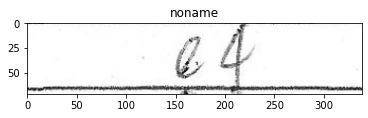

In [182]:
def get_random_cut_for( w):
    f= word_cuts[w][random.randrange( 0, len( word_cuts[w]))]
    return resize_( _load_image( f), 339, 72)

show( get_random_cut_for('e4'))

In [183]:
def pt_to_pgn( w):
    # R=> K
    # T=> R
    # C=> N
    # B=> B
    # D=> Q

#     print( w, '=> ')
    png= w.replace( 'R', 'K').replace( 'T', 'R').replace( 'C', 'N').replace( 'D', 'Q')
#     print( png)
    return png

def to_pgn( label):
    return [pt_to_pgn( w) for w in label]

def pgn_to_pt( w):
    # R => T
    # K => R
    # N => C
    # Q => D
    
    return w.replace( 'R', 'T').replace( 'K', 'R').replace( 'N', 'C').replace( 'Q', 'D')



In [184]:
def random_label_from_vocab():
    label= []
    for i in range( 0, 16):
        label.append( 
            words[random.randrange( 0, len( words))]
        )
    return label

print( random_label_from_vocab())    

['Nf3', 'Bb4', 'Bd3', 'Qxd4', 'Bxc5', 'Qd1', 'Nxc6', 'c3', 'Ne7', 'Bb4+', 'bxc3', 'Nbd2', 'Qxd5', 'Nb5', 'Ba5', 'Ne1']


In [185]:
def random_label_pt_from_vocab():
    label= []
    for i in range( 0, 16):
        label.append( 
            pgn_to_pt( words[random.randrange( 0, len( words))])
        )
    return label


print( random_label_pt_from_vocab())

['f4', 'Dxe4+', 'Dd1', 'gxf6', 'Bxd6', 'g5', 'h6', 'Ba5', 'Cf1', 'dxc4', 'Bxd7+', 'cxd4', 'g3', 'Dxd6', 'dxc5', 'Be6']


In [186]:
def rebuild( cuts):
    col1= np.concatenate((
            cuts[ 0], cuts[ 2], cuts[ 4], cuts[ 6], cuts[ 8], 
            cuts[10], cuts[12], cuts[14]
          ), axis= 0)
    col2= np.concatenate((
            cuts[ 1], cuts[ 3], cuts[ 5], cuts[ 7], cuts[ 9], 
            cuts[11], cuts[13], cuts[15]
          ), axis= 0)
    return np.concatenate((col1, col2), axis= 1)

def generate_for_label( label, seq, folder):    
    cuts= []
    for w in label:
        cuts.append( get_random_cut_for( w))
    img= rebuild( cuts)
    fname= "new-random_"+str( uuid.uuid4())[:6] 
    write_image( os.path.join( folder, 'images', fname+ ".jpg"), img)
    write_label( os.path.join( folder, 'labels', fname+ ".pgn"), " ".join( label))

In [188]:
def generate_mix( N):
    folder= os.path.join( "C:/mestrado/datasets/final/datasets_pool/parts")
    for i in range( 0, N):
        if i%100== 0:
            print( i)
        generate_for_label( random_label_from_vocab(), i+1, folder)
        
generate_mix( 20000)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [102]:
len( glob( os.path.join( 'C:/mestrado/datasets/final/parts-lib/from-handmade', 'bxc6', "*.jpg")))

234

In [103]:
#
# limpa datasets muito grandes. Deixa somente os 500 primeiros..
#
for w in words:
    hand_files= glob( os.path.join( 'C:/mestrado/datasets/final/parts-lib/from-handmade', w, "*.jpg"))
    print( w, len( hand_files))
    if len( hand_files)> 300:
        print( 'removendo ', w, len( hand_files[300:]))
        for f in hand_files[300:]:
            os.remove( f)
            
for w in words:
    hand_files= glob( os.path.join( 'C:/mestrado/datasets/final/parts-lib/from-torneios', w, "*.jpg"))
    print( w, len( hand_files))
    if len( hand_files)> 300:
        print( 'removendo ', w, len( hand_files[300:]))
        for f in hand_files[300:]:
            os.remove( f)

Ba4 174
Ba5 72
Ba7 38
Bb2 455
removendo  Bb2 155
Bb3 351
removendo  Bb3 51
Bb4 436
removendo  Bb4 136
Bb4+ 90
Bb5 480
removendo  Bb5 180
Bb5+ 109
Bb7 473
removendo  Bb7 173
Bc4 468
removendo  Bc4 168
Bc5 385
removendo  Bc5 85
Bd2 470
removendo  Bd2 170
Bd3 481
removendo  Bd3 181
Bd6 473
removendo  Bd6 173
Bd7 469
removendo  Bd7 169
Be2 478
removendo  Be2 178
Be3 481
removendo  Be3 181
Be5 166
Be6 467
removendo  Be6 167
Be7 484
removendo  Be7 184
Bf3 235
Bf4 475
removendo  Bf4 175
Bf5 467
removendo  Bf5 167
Bg2 480
removendo  Bg2 180
Bg3 233
Bg4 466
removendo  Bg4 166
Bg5 433
removendo  Bg5 133
Bg7 458
removendo  Bg7 158
Bh4 247
Bh6 273
Bh7 40
Bxb4 57
Bxc3 177
Bxc3+ 99
Bxc4 339
removendo  Bxc4 39
Bxc5 232
Bxc6 245
Bxc7 12
Bxd2+ 41
Bxd6 128
Bxd7+ 43
Bxf6 450
removendo  Bxf6 150
Kd8 65
Kxd8 44
Na4 210
Na5 276
Na6 248
Nb3 326
removendo  Nb3 26
Nb4 185
Nb5 255
Nb6 407
removendo  Nb6 107
Nbd2 419
removendo  Nbd2 119
Nbd7 464
removendo  Nbd7 164
Nbxd2 9
Nc2 112
Nc3 442
removendo  Nc3 142
Nc5 

In [89]:
#
# copia os manuais para o diretorio do dataset
#

org_dir= 'C:/mestrado/datasets/final/handmade-8lines/images'
files= glob( os.path.join( org_dir, "*.jpg"))

In [90]:
len( files)

3408

In [92]:
N_train= int(len( files)*0.8)

In [93]:
N_train

2726

In [94]:
files[0:1]

['C:/mestrado/datasets/final/handmade-8lines/images\\a3__d5__d4__Nf6_5742_1494_R_part3_scan0145.jpg']

In [95]:
random.shuffle(files)
print( files[0:1])

['C:/mestrado/datasets/final/handmade-8lines/images\\d4__Nf6_c4__c5__5940_1754_R_part3_scan0275.jpg']


In [100]:
#copia para o diretorio do dataset
for i in range( 0, len( files)):
    folder= "train" if i< N_train else "valid"
    f= files[i]
    
    dest_dir= os.path.join( "C:/mestrado/datasets/final/handmade-8lines/_splitted", folder)
    img_file= os.path.join( dest_dir, "images", Path(f).name)
    shutil.copyfile( f, img_file)
    shutil.copyfile( 
            f.replace( 'images', 'labels').replace( 'jpg', 'pgn'),                  
            img_file.replace( 'images', 'labels').replace( 'jpg', 'pgn'))

In [107]:
#
# limpa dataset de handmande para deixar só os que estão dentro do vocabulario
#
files= glob( os.path.join( "C:/mestrado/datasets/final/handmade-8lines/all-/labels", "*.pgn"))
print( len( files))

3408


In [112]:
valids=[]
for f in files:
    label= read_label(f).split()
    if all( e in words for e in label):
        valids.append( f)
print( len( valids))

2010


In [114]:
for f in valids:
    shutil.copyfile( f, f.replace( 'all-', 'valids-for-vocab'))
    shutil.copyfile( 
        f.replace( 'labels', 'images').replace( '.pgn', '.jpg'), 
        f.replace( 'labels', 'images').replace( '.pgn', '.jpg').replace( 'all-', 'valids-for-vocab'))    

In [115]:
for f in files:
    label= read_label(f).split()
    if not all( e in words for e in label):
        print( label)
        for w in label:
            print( w, w in words)
        break


['a3', 'e5', 'Nc3', 'd5', 'e4', 'd4', 'Nce2', 'c5', 'Ng3', 'Be6', 'Nf3', 'Bd6', 'Bb5+', 'Nd7', 'd3', 'f6']
a3 True
e5 True
Nc3 True
d5 True
e4 True
d4 True
Nce2 False
c5 True
Ng3 False
Be6 True
Nf3 True
Bd6 True
Bb5+ True
Nd7 True
d3 True
f6 True


In [ ]:
#
# gera random por fontes sinteticas
#

In [203]:
def to_pgn( label):
    return [pt_to_pgn( w) for w in label]


img = Image.open("C:/mestrado/datasets/syn/template/template-2x.jpg")  # load base image
dctx = ImageDraw.Draw(img)  # create drawing context
dh_top= 14
dh_bottom= 26
h= (img.height - dh_top - dh_bottom)/25.0
w= img.width/4.0

margin_left= w/4
margin_top= h/6

def generate_for( line):
    img = Image.open("C:/mestrado/datasets/syn/template/template-2x.jpg")  # load base image
    dctx = ImageDraw.Draw(img)  # create drawing context

    i= 0
    for ln in range( 0, 8):
        for col in range( 0, 2):
            if i>= len( line):
                del dctx
                return img
        
            fnt= random.choice( all_fonts)
            txtsz = dctx.textsize(line[i], fnt)
        
            x= w* col + (w - txtsz[0])/2
            if random.random()< 0.7:
                xmargem= int( (w - txtsz[0])/3)
                x+= random.randint( -xmargem, xmargem)
            y= dh_top + h*ln + (h - txtsz[1])/2 #+ margin_top

            dctx.text( (x, y), line[i], font=fnt, fill="#000000")
            i= i+1
            
    del dctx 
    return img

def cut( img):
    h= 600
    w= 690 #345

    img1= img[:h, :w]
    return img1

def generate_one( label): 
    img= generate_for( label)
    img= cut( np.asarray(img))
    img= PIL.Image.fromarray(np.uint8(img))
    return img

def __generate_random( N):
#     N_train= int(N*0.8)
#     print( 'N', N, 'N_train', N_train)
    
    for i in range( 0, N):
        if( i%100== 0):
            clear_output(wait=True)
            print( i, '....')
        label_pt= random_label_pt_from_vocab()
        img= generate_one( label_pt)
#         img= random_transform( img, 0.3)
        pgn= to_pgn( label_pt)

#         folder= 'train' if i< N_train else 'valid'
        
        # save
#         show( img)
        img_file= os.path.join( 'C:/mestrado/datasets/final/datasets_pool/syn', 
                        'images', "random-syn--"+str( uuid.uuid4())[:6]+'.jpg')
        img.save( img_file)
        write_label( img_file.replace( 'images', 'labels').replace( '.jpg', '.pgn'), 
                    " ".join( to_pgn( label_pt)))

__generate_random( 10000)
print( 'DONE!')

9900 ....
DONE!


In [145]:
#
# Gera dataset combinando quantidades x, y e z do datasets de parts, sync e handmade
#

# le quantidades
files= glob( 'C:/mestrado/datasets/final/datasets_pool/*/labels/*.pgn')



In [146]:
len( files)

31992

In [150]:
len( [f for f in files if 'from-syn' in f])

9999

In [151]:
print( 'hand', len( [f for f in files if 'hand' in f]))
print( 'parts', len( [f for f in files if 'parts' in f]))

hand 2010
parts 19983


In [198]:
def generate_dataset( N, n_parts, n_sync, N_hand_max= None, ver= 'undefined'):
    #N_ratio = (parts,syn)
    
    # cria diretorio
    root= 'C:/mestrado/datasets/final/datasets/new-random-8lines--'+ ver
    Path( os.path.join( root, 'train/images')).mkdir(parents=True, exist_ok=True)
    Path( os.path.join( root, 'train/labels')).mkdir(parents=True, exist_ok=True)
    Path( os.path.join( root, 'valid/images')).mkdir(parents=True, exist_ok=True)
    Path( os.path.join( root, 'valid/labels')).mkdir(parents=True, exist_ok=True)
    
    # le os arquivos
    files_hand= glob( 'C:/mestrado/datasets/final/datasets_pool/hand/labels/*.pgn')
    files_syn= glob( 'C:/mestrado/datasets/final/datasets_pool/syn/labels/*.pgn')
    files_parts= glob( 'C:/mestrado/datasets/final/datasets_pool/parts/labels/*.pgn')
    
    N_hand= len( files_hand)
    if N_hand_max is not None:
        N_hand= min( N_hand_max, len( files_hand))

    
    N_parts= int( (N-N_hand)* (n_parts/(n_parts+n_sync)))
    N_syn= N - N_hand - N_parts
    
    print( 'gerar total', N, 'hand', N_hand, 'parts', N_parts, 'syc', N_syn)
    N_train= int( N*.8)
    print( 'train, valid', N_train, N-N_train)
    
#     return
    
    files= []
    files.extend( files_hand[:N_hand])
    files.extend( files_syn[:N_syn])
    files.extend( files_parts[:N_parts])
    
    # shuffle
    random.shuffle( files)
    print( len( files))
    
    # copia
    for i in range( 0, len( files)):
        if( i%100== 0):
#             clear_output(wait=True)
            print( i, '....')
        
        f= files[i]
        folder= 'train' if i< N_train else 'valid'
        
        # copia
        dest_file= os.path.join( root, folder, 'labels', Path(f).name)
        shutil.copyfile( f, dest_file)
        shutil.copyfile( 
            f.replace( 'labels', 'images').replace( 'pgn', 'jpg'),                  
            dest_file.replace( 'labels', 'images').replace( 'pgn', 'jpg'))
    
#generate_dataset( 15000, (2,1), None, 'v2')

In [199]:
generate_dataset( 4000, 1, 0, 0, 'v7')

gerar total 4000 hand 0 parts 4000 syc 0
train, valid 3200 800
4000
0 ....
100 ....
200 ....
300 ....
400 ....
500 ....
600 ....
700 ....
800 ....
900 ....
1000 ....
1100 ....
1200 ....
1300 ....
1400 ....
1500 ....
1600 ....
1700 ....
1800 ....
1900 ....
2000 ....
2100 ....
2200 ....
2300 ....
2400 ....
2500 ....
2600 ....
2700 ....
2800 ....
2900 ....
3000 ....
3100 ....
3200 ....
3300 ....
3400 ....
3500 ....
3600 ....
3700 ....
3800 ....
3900 ....


In [204]:
generate_dataset( 20000, 0, 1, None, 'v8--20k-hand-sync-')

gerar total 20000 hand 2010 parts 0 syc 17990
train, valid 16000 4000
20000
0 ....
100 ....
200 ....
300 ....
400 ....
500 ....
600 ....
700 ....
800 ....
900 ....
1000 ....
1100 ....
1200 ....
1300 ....
1400 ....
1500 ....
1600 ....
1700 ....
1800 ....
1900 ....
2000 ....
2100 ....
2200 ....
2300 ....
2400 ....
2500 ....
2600 ....
2700 ....
2800 ....
2900 ....
3000 ....
3100 ....
3200 ....
3300 ....
3400 ....
3500 ....
3600 ....
3700 ....
3800 ....
3900 ....
4000 ....
4100 ....
4200 ....
4300 ....
4400 ....
4500 ....
4600 ....
4700 ....
4800 ....
4900 ....
5000 ....
5100 ....
5200 ....
5300 ....
5400 ....
5500 ....
5600 ....
5700 ....
5800 ....
5900 ....
6000 ....
6100 ....
6200 ....
6300 ....
6400 ....
6500 ....
6600 ....
6700 ....
6800 ....
6900 ....
7000 ....
7100 ....
7200 ....
7300 ....
7400 ....
7500 ....
7600 ....
7700 ....
7800 ....
7900 ....
8000 ....
8100 ....
8200 ....
8300 ....
8400 ....
8500 ....
8600 ....
8700 ....
8800 ....
8900 ....
9000 ....
9100 ....
9200 ....
9300 .

In [201]:
generate_dataset( 10000, 1, 4, None, 'v9--10k-mix-')

gerar total 10000 hand 2010 parts 1598 syc 6392
train, valid 8000 2000
10000
0 ....
100 ....
200 ....
300 ....
400 ....
500 ....
600 ....
700 ....
800 ....
900 ....
1000 ....
1100 ....
1200 ....
1300 ....
1400 ....
1500 ....
1600 ....
1700 ....
1800 ....
1900 ....
2000 ....
2100 ....
2200 ....
2300 ....
2400 ....
2500 ....
2600 ....
2700 ....
2800 ....
2900 ....
3000 ....
3100 ....
3200 ....
3300 ....
3400 ....
3500 ....
3600 ....
3700 ....
3800 ....
3900 ....
4000 ....
4100 ....
4200 ....
4300 ....
4400 ....
4500 ....
4600 ....
4700 ....
4800 ....
4900 ....
5000 ....
5100 ....
5200 ....
5300 ....
5400 ....
5500 ....
5600 ....
5700 ....
5800 ....
5900 ....
6000 ....
6100 ....
6200 ....
6300 ....
6400 ....
6500 ....
6600 ....
6700 ....
6800 ....
6900 ....
7000 ....
7100 ....
7200 ....
7300 ....
7400 ....
7500 ....
7600 ....
7700 ....
7800 ....
7900 ....
8000 ....
8100 ....
8200 ....
8300 ....
8400 ....
8500 ....
8600 ....
8700 ....
8800 ....
8900 ....
9000 ....
9100 ....
9200 ....
9300 

In [ ]:
generate_dataset( 15000, (2,1), None, 'v2')

In [173]:
generate_dataset( 2010 , (2,1), None, 'v3')

gerar total, hand, parts, syn 2010 2010 0 0
train, valid 1608 402
2010
0 ....
100 ....
200 ....
300 ....
400 ....
500 ....
600 ....
700 ....
800 ....
900 ....
1000 ....
1100 ....
1200 ....
1300 ....
1400 ....
1500 ....
1600 ....
1700 ....
1800 ....
1900 ....
2000 ....


In [174]:
generate_dataset( 4000 , (1,0), 0, 'v4')

gerar total, hand, parts, syn 4000 0 4000 0
train, valid 3200 800
4000
0 ....
100 ....
200 ....
300 ....
400 ....
500 ....
600 ....
700 ....
800 ....
900 ....
1000 ....
1100 ....
1200 ....
1300 ....
1400 ....
1500 ....
1600 ....
1700 ....
1800 ....
1900 ....
2000 ....
2100 ....
2200 ....
2300 ....
2400 ....
2500 ....
2600 ....
2700 ....
2800 ....
2900 ....
3000 ....
3100 ....
3200 ....
3300 ....
3400 ....
3500 ....
3600 ....
3700 ....
3800 ....
3900 ....


In [175]:
generate_dataset( 4000 , (0,1), 0, 'v5')

gerar total, hand, parts, syn 4000 0 0 4000
train, valid 3200 800
4000
0 ....
100 ....
200 ....
300 ....
400 ....
500 ....
600 ....
700 ....
800 ....
900 ....
1000 ....
1100 ....
1200 ....
1300 ....
1400 ....
1500 ....
1600 ....
1700 ....
1800 ....
1900 ....
2000 ....
2100 ....
2200 ....
2300 ....
2400 ....
2500 ....
2600 ....
2700 ....
2800 ....
2900 ....
3000 ....
3100 ....
3200 ....
3300 ....
3400 ....
3500 ....
3600 ....
3700 ....
3800 ....
3900 ....


In [176]:
generate_dataset( 4000 , (0,1), None, 'v6')

gerar total, hand, parts, syn 4000 2010 0 1990
train, valid 3200 800
4000
0 ....
100 ....
200 ....
300 ....
400 ....
500 ....
600 ....
700 ....
800 ....
900 ....
1000 ....
1100 ....
1200 ....
1300 ....
1400 ....
1500 ....
1600 ....
1700 ....
1800 ....
1900 ....
2000 ....
2100 ....
2200 ....
2300 ....
2400 ....
2500 ....
2600 ....
2700 ....
2800 ....
2900 ....
3000 ....
3100 ....
3200 ....
3300 ....
3400 ....
3500 ....
3600 ....
3700 ....
3800 ....
3900 ....


In [206]:
generate_dataset( 20000 , 1,0, 0, 'v10--parts-20k')

gerar total 20000 hand 0 parts 20000 syc 0
train, valid 16000 4000
19989
0 ....
100 ....
200 ....
300 ....
400 ....
500 ....
600 ....
700 ....
800 ....
900 ....
1000 ....
1100 ....
1200 ....
1300 ....
1400 ....
1500 ....
1600 ....
1700 ....
1800 ....
1900 ....
2000 ....
2100 ....
2200 ....
2300 ....
2400 ....
2500 ....
2600 ....
2700 ....
2800 ....
2900 ....
3000 ....
3100 ....
3200 ....
3300 ....
3400 ....
3500 ....
3600 ....
3700 ....
3800 ....
3900 ....
4000 ....
4100 ....
4200 ....
4300 ....
4400 ....
4500 ....
4600 ....
4700 ....
4800 ....
4900 ....
5000 ....
5100 ....
5200 ....
5300 ....
5400 ....
5500 ....
5600 ....
5700 ....
5800 ....
5900 ....
6000 ....
6100 ....
6200 ....
6300 ....
6400 ....
6500 ....
6600 ....
6700 ....
6800 ....
6900 ....
7000 ....
7100 ....
7200 ....
7300 ....
7400 ....
7500 ....
7600 ....
7700 ....
7800 ....
7900 ....
8000 ....
8100 ....
8200 ....
8300 ....
8400 ....
8500 ....
8600 ....
8700 ....
8800 ....
8900 ....
9000 ....
9100 ....
9200 ....
9300 ....

In [207]:
generate_dataset( 15000 , 1,1, None, 'v11--mix-15k')

gerar total 15000 hand 2010 parts 6495 syc 6495
train, valid 12000 3000
15000
0 ....
100 ....
200 ....
300 ....
400 ....
500 ....
600 ....
700 ....
800 ....
900 ....
1000 ....
1100 ....
1200 ....
1300 ....
1400 ....
1500 ....
1600 ....
1700 ....
1800 ....
1900 ....
2000 ....
2100 ....
2200 ....
2300 ....
2400 ....
2500 ....
2600 ....
2700 ....
2800 ....
2900 ....
3000 ....
3100 ....
3200 ....
3300 ....
3400 ....
3500 ....
3600 ....
3700 ....
3800 ....
3900 ....
4000 ....
4100 ....
4200 ....
4300 ....
4400 ....
4500 ....
4600 ....
4700 ....
4800 ....
4900 ....
5000 ....
5100 ....
5200 ....
5300 ....
5400 ....
5500 ....
5600 ....
5700 ....
5800 ....
5900 ....
6000 ....
6100 ....
6200 ....
6300 ....
6400 ....
6500 ....
6600 ....
6700 ....
6800 ....
6900 ....
7000 ....
7100 ....
7200 ....
7300 ....
7400 ....
7500 ....
7600 ....
7700 ....
7800 ....
7900 ....
8000 ....
8100 ....
8200 ....
8300 ....
8400 ....
8500 ....
8600 ....
8700 ....
8800 ....
8900 ....
9000 ....
9100 ....
9200 ....
9300

In [208]:
generate_dataset( 10000 , 0,1, None, 'v12--somente-syn--10k')

gerar total 10000 hand 2010 parts 0 syc 7990
train, valid 8000 2000
10000
0 ....
100 ....
200 ....
300 ....
400 ....
500 ....
600 ....
700 ....
800 ....
900 ....
1000 ....
1100 ....
1200 ....
1300 ....
1400 ....
1500 ....
1600 ....
1700 ....
1800 ....
1900 ....
2000 ....
2100 ....
2200 ....
2300 ....
2400 ....
2500 ....
2600 ....
2700 ....
2800 ....
2900 ....
3000 ....
3100 ....
3200 ....
3300 ....
3400 ....
3500 ....
3600 ....
3700 ....
3800 ....
3900 ....
4000 ....
4100 ....
4200 ....
4300 ....
4400 ....
4500 ....
4600 ....
4700 ....
4800 ....
4900 ....
5000 ....
5100 ....
5200 ....
5300 ....
5400 ....
5500 ....
5600 ....
5700 ....
5800 ....
5900 ....
6000 ....
6100 ....
6200 ....
6300 ....
6400 ....
6500 ....
6600 ....
6700 ....
6800 ....
6900 ....
7000 ....
7100 ....
7200 ....
7300 ....
7400 ....
7500 ....
7600 ....
7700 ....
7800 ....
7900 ....
8000 ....
8100 ....
8200 ....
8300 ....
8400 ....
8500 ....
8600 ....
8700 ....
8800 ....
8900 ....
9000 ....
9100 ....
9200 ....
9300 ...

In [ ]:
def transform_file( f):
    img= Image.open( f)
    img= random_transform( img, None)
    img.save( f)
    
def resize( path, width, height):
    img= cv2.imread( path)
    img= cv2.resize(img, (width, height), interpolation = cv2.INTER_AREA) 
    cv2.imwrite( path, img)    

def transform_and_resize( folder):
    # pega todas as imagens
    img_files= glob( os.path.join( folder, '*', 'images/*.jpg')
                    
    # resize
    for f in img_files:
        resize( f)
                    
    # para os sinteticos faz uma transformacao
    synfiles= [f from f in img_files if 'syn' in f]
    for f in synfiles:
        transform_file( f)
    
    
# transform_and_resize( 'C:/mestrado/datasets/final/datasets/new-random-8lines--v9--10k-mix-)